In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

In [2]:
# Load the dataset
df = pd.read_excel('../data/telecom_data.xlsx')

In [3]:
# Inspect the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   Bearer Id                                 150001 non-null  object        
 1   Start                                     150000 non-null  datetime64[ns]
 2   Start ms                                  150000 non-null  float64       
 3   End                                       150000 non-null  datetime64[ns]
 4   End ms                                    150000 non-null  float64       
 5   Dur. (ms)                                 150000 non-null  float64       
 6   IMSI                                      149431 non-null  float64       
 7   MSISDN/Number                             148935 non-null  float64       
 8   IMEI                                      149429 non-null  float64       
 9   Last Location N

In [4]:
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,13114483460844900352,2019-04-04 12:01:18,770.0,2019-04-25 14:35:31,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,13114483482878900224,2019-04-09 13:04:04,235.0,2019-04-25 08:15:48,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,13114483484080500736,2019-04-09 17:42:11,1.0,2019-04-25 11:58:13,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,13114483485442799616,2019-04-10 00:31:25,486.0,2019-04-25 07:36:35,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,13114483499480700928,2019-04-12 20:10:23,565.0,2019-04-25 10:40:32,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [5]:
# Task 1: Top Handsets and Manufacturers Analysis
# Identify top 10 handsets
top_10_handsets = df['Handset Type'].value_counts().head(10)
print("Top 10 Handsets:")
print(top_10_handsets)

# Identify top 3 handset manufacturers
top_3_manufacturers = df['Handset Manufacturer'].value_counts().head(3)
print("Top 3 Handset Manufacturers:")
print(top_3_manufacturers)

# Identify top 5 handsets per top 3 handset manufacturer
top_handsets_per_manufacturer = df[df['Handset Manufacturer'].isin(top_3_manufacturers.index)].groupby('Handset Manufacturer')['Handset Type'].value_counts().groupby(level=0).head(5)
print("Top 5 Handsets per Top 3 Manufacturers:")
print(top_handsets_per_manufacturer)

Top 10 Handsets:
Handset Type
Huawei B528S-23A                19752
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: count, dtype: int64
Top 3 Handset Manufacturers:
Handset Manufacturer
Apple      59565
Samsung    40839
Huawei     34423
Name: count, dtype: int64
Top 5 Handsets per Top 3 Manufacturers:
Handset Manufacturer  Handset Type                  
Apple                 Apple iPhone 6S (A1688)            9419
                      Apple iPhone 6 (A1586)             9023
                      Apple iPhone 7 (A1778)             6326
                      Apple iPhone Se (A1723)            5187
                      Apple iPhone 8 (A1905)             4993
Huawei                Huawei B528S

In [6]:
# Print columns to check for mismatches
print(df.columns)

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',


In [7]:
# Strip spaces from column names if needed
df.columns = df.columns.str.strip()

# Add the total data volume column
df['Total Data Volume'] = df['Total DL (Bytes)'] + df['Total UL (Bytes)']

# Aggregation per user
user_agg = df.groupby('MSISDN/Number').agg({
    'Bearer Id': 'count',  # Number of sessions
    'Dur. (ms)': 'sum',     # Total session duration
    'Total DL (Bytes)': 'sum',
    'Total UL (Bytes)': 'sum',
    'Total Data Volume': 'sum'  # Total data volume
}).rename(columns={
    'Bearer Id': 'Number of Sessions',
    'Dur. (ms)': 'Total Duration (ms)',
    'Total DL (Bytes)': 'Total Download (Bytes)',
    'Total UL (Bytes)': 'Total Upload (Bytes)'
})

# Print the aggregated data
print("Aggregated User Data:")
print(user_agg.head())

Aggregated User Data:
               Number of Sessions  Total Duration (ms)  \
MSISDN/Number                                            
3.360100e+10                    1             116720.0   
3.360100e+10                    1             181230.0   
3.360100e+10                    1             134969.0   
3.360101e+10                    1              49878.0   
3.360101e+10                    2              37104.0   

               Total Download (Bytes)  Total Upload (Bytes)  Total Data Volume  
MSISDN/Number                                                                   
3.360100e+10             8.426375e+08            36053108.0       8.786906e+08  
3.360100e+10             1.207552e+08            36104459.0       1.568596e+08  
3.360100e+10             5.566597e+08            39306820.0       5.959665e+08  
3.360101e+10             4.019932e+08            20327526.0       4.223207e+08  
3.360101e+10             1.363130e+09            94280527.0       1.457411e+09  


Descriptive Statistics:
       Number of Sessions  Total Duration (ms)  Total Download (Bytes)  \
count       106856.000000         1.068560e+05            1.068560e+05   
mean             1.393792         1.461672e+05            6.336527e+08   
std              0.806022         1.863587e+05            4.645551e+08   
min              1.000000         7.142000e+03            8.827082e+06   
25%              1.000000         7.130800e+04            3.148271e+08   
50%              1.000000         1.027400e+05            5.703677e+08   
75%              2.000000         1.727990e+05            8.073645e+08   
max             18.000000         1.855375e+07            8.156743e+09   

       Total Upload (Bytes)  Total Data Volume  
count          1.068560e+05       1.068560e+05  
mean           5.730942e+07       6.909621e+08  
std            3.565765e+07       4.910559e+08  
min            2.866892e+06       3.324901e+07  
25%            3.639547e+07       3.585499e+08  
50%            

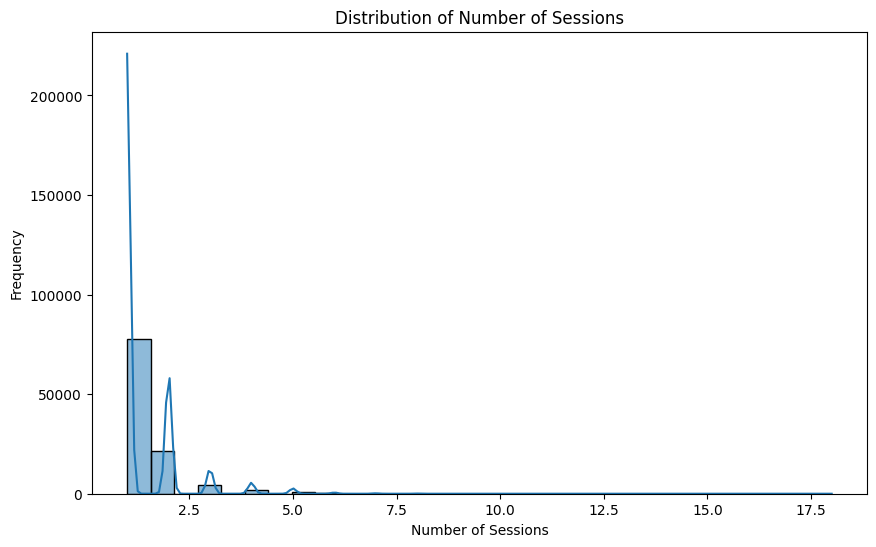

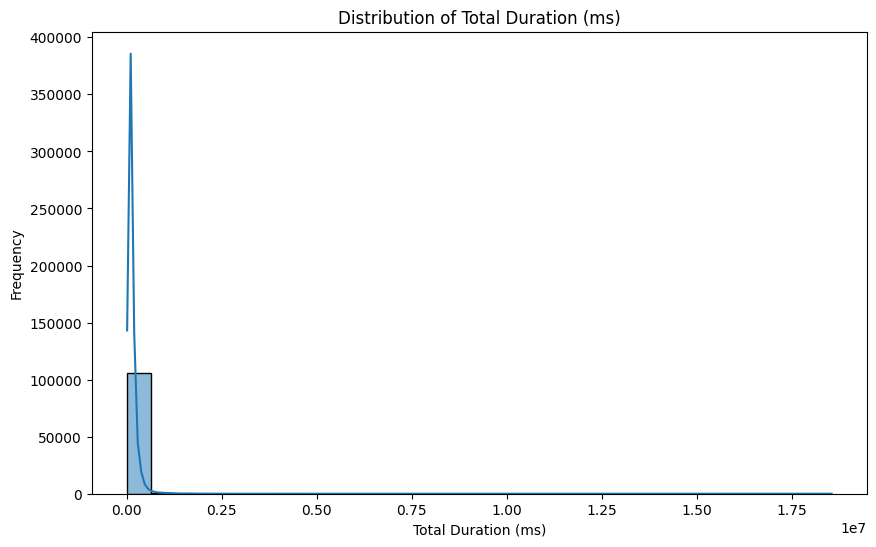

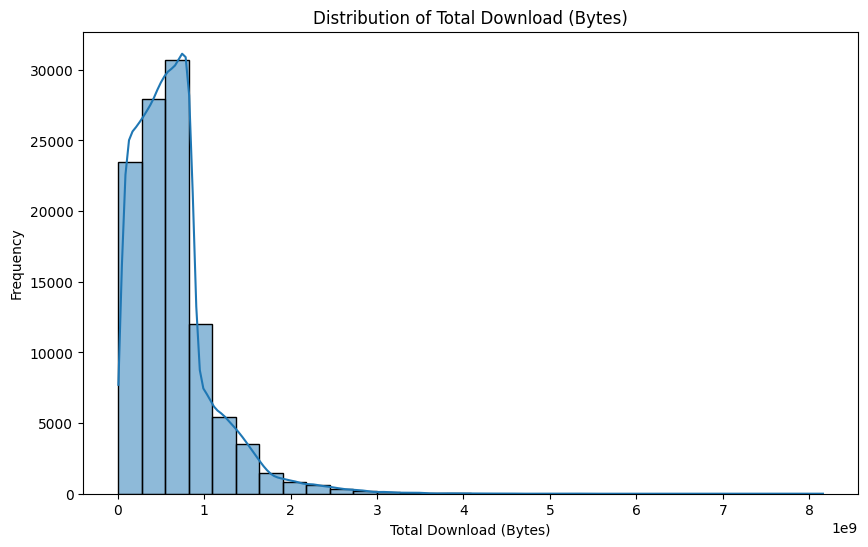

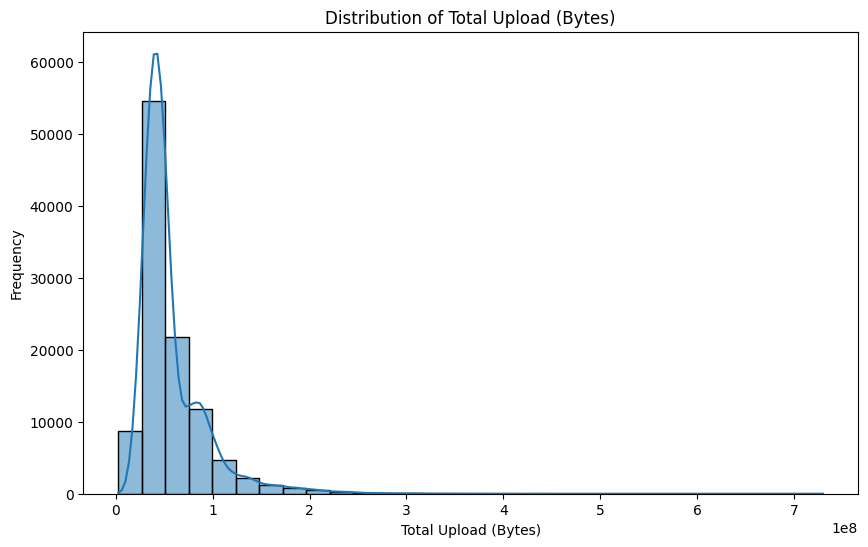

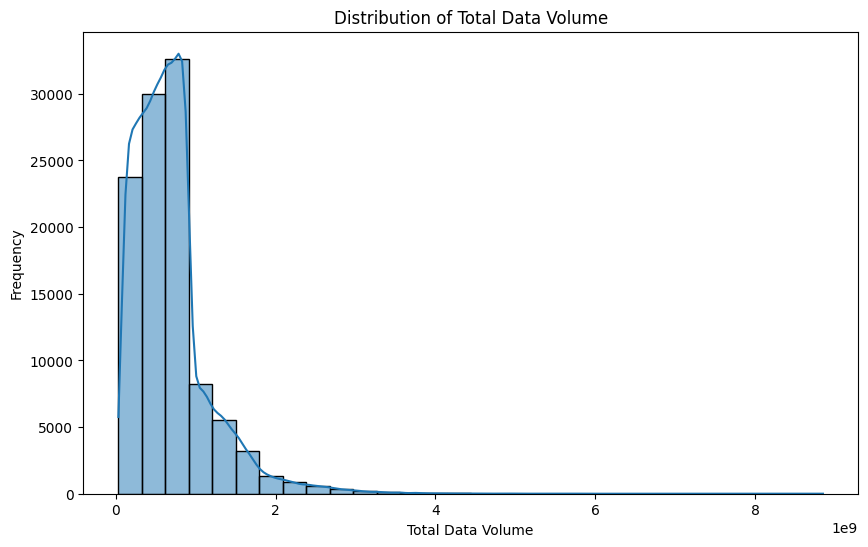

In [8]:
# Compute descriptive statistics
print("Descriptive Statistics:")
print(user_agg.describe())

# Plot histograms for each metric
metrics = ['Number of Sessions', 'Total Duration (ms)', 'Total Download (Bytes)', 'Total Upload (Bytes)', 'Total Data Volume']
for metric in metrics:
    plt.figure(figsize=(10, 6))
    sns.histplot(user_agg[metric], bins=30, kde=True)
    plt.title(f'Distribution of {metric}')
    plt.xlabel(metric)
    plt.ylabel('Frequency')
    plt.show()

In [9]:
# Task 1.2: Exploratory Data Analysis (EDA)

# 1. Describe relevant variables
print("Variable Description:")
print(df.describe())

Variable Description:
                               Start       Start ms  \
count                         150000  150000.000000   
mean   2019-04-26 12:36:38.953740032     499.188200   
min              2019-04-04 12:01:18       0.000000   
25%    2019-04-25 00:26:00.750000128     250.000000   
50%       2019-04-26 08:51:24.500000     499.000000   
75%    2019-04-27 18:18:59.750000128     749.000000   
max              2019-04-29 07:28:43     999.000000   
std                              NaN     288.611834   

                                 End         End ms     Dur. (ms)  \
count                         150000  150000.000000  1.500000e+05   
mean   2019-04-27 17:40:08.059673344     498.800880  1.046086e+05   
min              2019-04-24 22:59:58       0.000000  7.142000e+03   
25%       2019-04-26 07:30:11.500000     251.000000  5.744050e+04   
50%              2019-04-27 23:02:05     500.000000  8.639900e+04   
75%       2019-04-29 07:15:07.500000     750.000000  1.324302e+05   

In [10]:
# 2. Segment users into deciles based on total duration
df['Total Data Usage'] = df['Total DL (Bytes)'] + df['Total UL (Bytes)']
df['Decile'] = pd.qcut(df['Dur. (ms)'], 5, labels=False)

decile_agg = df.groupby('Decile').agg({
    'Total Data Usage': 'sum'
})
print("Total Data Usage per Decile:")
print(decile_agg)

Total Data Usage per Decile:
        Total Data Usage
Decile                  
0.0         1.488357e+13
1.0         2.362045e+13
2.0         6.087404e+12
3.0         1.485493e+13
4.0         1.491834e+13


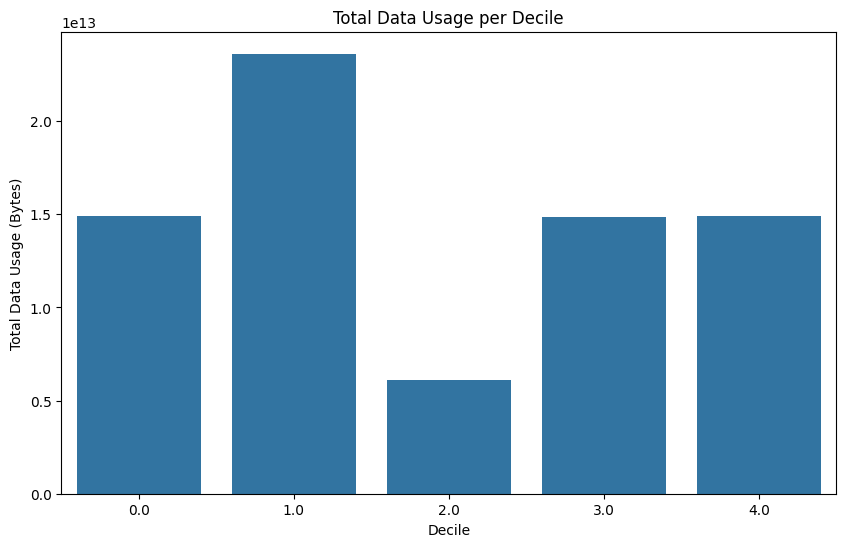

In [11]:
plt.figure(figsize=(10, 6))
sns.barplot(x=decile_agg.index, y=decile_agg['Total Data Usage'])
plt.title('Total Data Usage per Decile')
plt.xlabel('Decile')
plt.ylabel('Total Data Usage (Bytes)')
plt.show()

In [12]:
# 3. Basic metrics (mean, median, etc.)
basic_metrics = df[['Dur. (ms)', 'Total Data Usage']].describe()
print("Basic Metrics:")
print(basic_metrics)

Basic Metrics:
          Dur. (ms)  Total Data Usage
count  1.500000e+05      1.500000e+05
mean   1.046086e+05      4.957646e+08
std    8.103762e+04      2.443818e+08
min    7.142000e+03      2.895611e+07
25%    5.744050e+04      2.844759e+08
50%    8.639900e+04      4.968611e+08
75%    1.324302e+05      7.065059e+08
max    1.859336e+06      9.559848e+08


In [13]:
# 4. Non-Graphical Univariate Analysis (variance, standard deviation)
# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Calculate variance and standard deviation
variance = numeric_df.var()
std_dev = numeric_df.std()
print("Variance:")
print(variance)
print("Standard Deviation:")
print(std_dev)

Variance:
Start ms                                    8.329679e+04
End ms                                      8.300026e+04
Dur. (ms)                                   6.567096e+09
IMSI                                        4.617380e+20
MSISDN/Number                               5.989979e+24
IMEI                                        5.024937e+26
Avg RTT DL (ms)                             3.841306e+05
Avg RTT UL (ms)                             7.189942e+03
Avg Bearer TP DL (kbps)                     5.746510e+08
Avg Bearer TP UL (kbps)                     2.139391e+07
TCP DL Retrans. Vol (Bytes)                 3.333054e+16
TCP UL Retrans. Vol (Bytes)                 6.997637e+14
DL TP < 50 Kbps (%)                         1.699903e+02
50 Kbps < DL TP < 250 Kbps (%)              3.862912e+01
250 Kbps < DL TP < 1 Mbps (%)               1.730176e+01
DL TP > 1 Mbps (%)                          2.331818e+01
UL TP < 10 Kbps (%)                         2.147660e+01
10 Kbps < UL TP < 50 

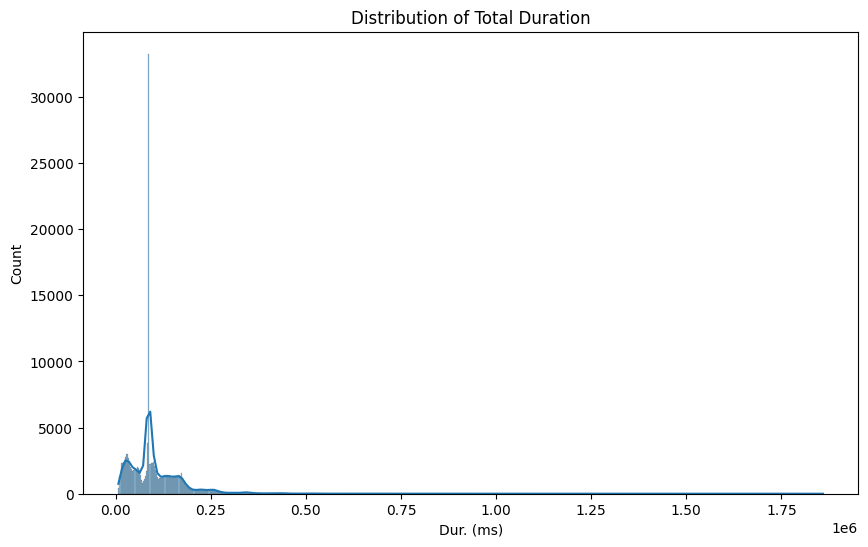

In [14]:
# 5. Graphical Univariate Analysis
plt.figure(figsize=(10, 6))
sns.histplot(df['Dur. (ms)'], kde=True)
plt.title('Distribution of Total Duration')
plt.show()

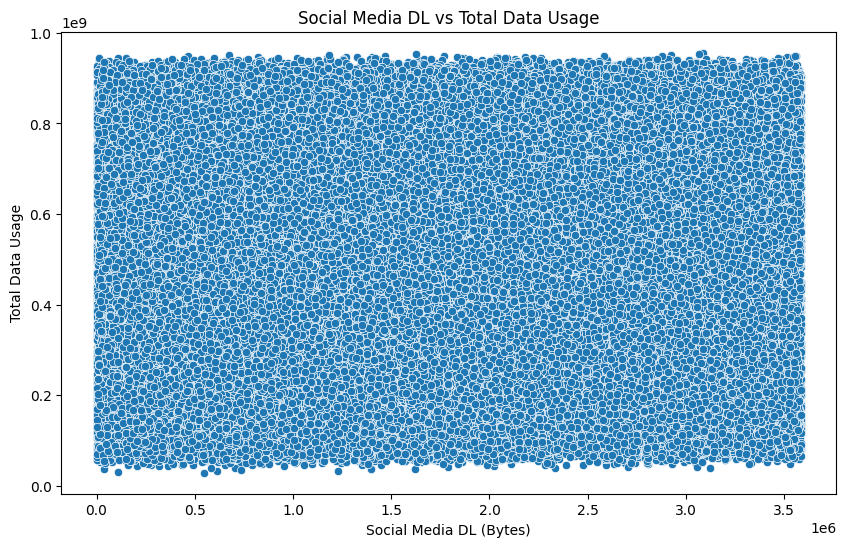

In [15]:
# 6. Bivariate Analysis (scatter plot between applications and data usage)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Social Media DL (Bytes)', y='Total Data Usage', data=df)
plt.title('Social Media DL vs Total Data Usage')
plt.show()

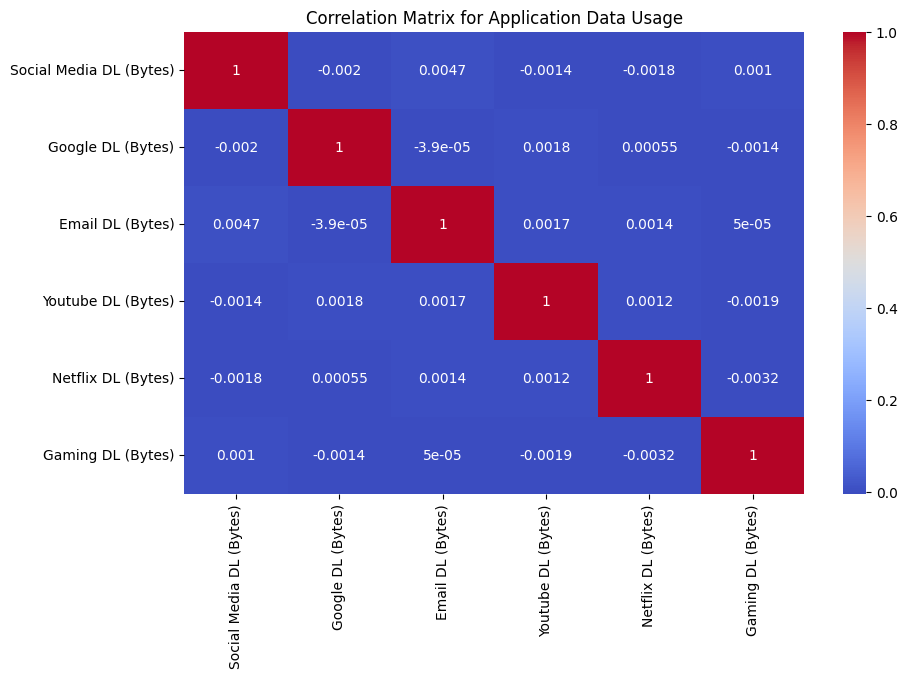

In [16]:
# 7. Correlation Analysis
corr_matrix = df[['Social Media DL (Bytes)', 'Google DL (Bytes)', 'Email DL (Bytes)', 'Youtube DL (Bytes)', 'Netflix DL (Bytes)', 'Gaming DL (Bytes)']].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Application Data Usage')
plt.show()

In [17]:
# 8. Dimensionality Reduction (PCA)
features = ['Social Media DL (Bytes)', 'Google DL (Bytes)', 'Email DL (Bytes)', 'Youtube DL (Bytes)', 'Netflix DL (Bytes)', 'Gaming DL (Bytes)']
X = df[features].dropna()

pca = PCA(n_components=2)
pca_results = pca.fit_transform(X)

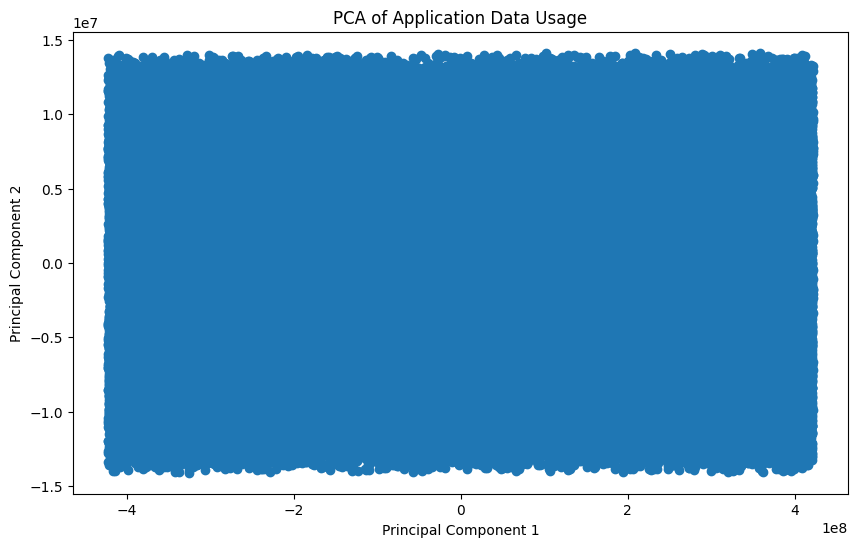

Explained Variance by each principal component: [9.98266540e-01 7.58794379e-04]


In [18]:
# Visualize the PCA results
plt.figure(figsize=(10, 6))
plt.scatter(pca_results[:, 0], pca_results[:, 1])
plt.title('PCA of Application Data Usage')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# PCA Explained Variance
explained_variance = pca.explained_variance_ratio_
print(f'Explained Variance by each principal component: {explained_variance}')